In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/학습/패스트캠퍼스/머신러닝과 데이터분석/2. [Machine Learning]/PART 4) Ensemble 기법의 종류와 원리/3. 실습데이터/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1.0,0,3,7,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2.0,0,3,7,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,1.0,0,3,6,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1.0,0,5,7,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1.0,0,3,8,1987,0,98074,47.6168,-122.045


In [ ]:
ncar = data.shape[0]
nvar = data.shape[1]
print(ncar)
print(nvar)

21613
14


In [ ]:
data = data.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis =1)

In [ ]:
feature_columns = list(data.columns.difference(['price']))
X = data[feature_columns]
y = data['price']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(15129, 8) (6484, 8) (15129,) (6484,)


In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

sm_train_x = sm.add_constant(train_x, has_constant = "add")
sm_model = sm.OLS(train_y, sm_train_x)
fitted_sm_model = sm_model.fit()
fitted_sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     2776.
Date:                Sun, 05 Jul 2020   Prob (F-statistic):               0.00
Time:                        05:31:43   Log-Likelihood:            -2.0826e+05
No. Observations:               15129   AIC:                         4.165e+05
Df Residuals:                   15120   BIC:                         4.166e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.186e+06   1.73e+05     41.548      0.000    6.85e+06    7.52e+06
bathrooms     1.303e+05   3960.833     32.889      0.000    1.23e+05    1.38e+05
bedrooms     -2224.7910   2382.356     -0.934      0.350   -6894.497    2444.915
condition     1.641e+04   3169.013      5.178      0.000    1.02e+04    2.26e+04
floors        1946.3052   4336.838      0.449      0.654   -6554.422    1.04e+04
grade         1.956e+05   2199.540     88.924      0.000    1.91e+05       2e+05
waterfront    7.555e+05   2.26e+04     33.479      0.000    7.11e+05       8e+05
yr_built     -4300.7865     88.073    -48.832      0.000   -4473.420   -4128.153
yr_renovated    12.7325      5.043      2.525      0.012       2.847      22.618
==============================================================================
Omnibus:                    13447.374   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1684794.827
Skew:                           3.763   Prob(JB):                         0.00
Kurtosis:                      54.147   Cond. No.                     1.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
sm_test_x = sm.add_constant(test_x, has_constant = "add")
sm_model_predict = fitted_sm_model.predict(sm_test_x)

In [ ]:
sqrt(mean_squared_error(sm_model_predict, test_y))

239804.29670858156

In [ ]:
import random
bagging_predict_result = []
for _ in range(10):
    data_index = [data_index for data_index in range(train_x.shape[0])]
    random_data_index = np.random.choice(data_index, train_x.shape[0])
    print(len(set(random_data_index)))
    sm_train_x = train_x.iloc[random_data_index,]
    sm_train_y = train_y.iloc[random_data_index,]
    sm_train_x = sm.add_constant(sm_train_x, has_constant = "add")
    sm_model = sm.OLS(sm_train_y, sm_train_x)
    fitted_sm_model = sm_model.fit()
    pred = fitted_sm_model.predict(sm_test_x)
    bagging_predict_result.append(pred)
    print(sqrt(mean_squared_error(pred, test_y)))

9535
240296.07641580427
9565
239691.0109396686
9494
239824.62561392016
9568
239905.36257364324
9546
240635.4078527728
9574
240998.25347087477
9533
241016.5567644427
9599
240289.8845911686
9599
240037.5930909607
9517
240386.0561484329


In [ ]:
bagging_predict_result[3]

735      5.556479e+05
2830     7.040205e+05
4106     1.093731e+06
16218    1.448017e+06
19964    6.882562e+05
             ...     
12606    5.949164e+05
14393    6.846567e+05
6899     3.285082e+05
85       9.007117e+05
21363    4.302262e+05
Length: 6484, dtype: float64

In [ ]:
bagging_predict = []
for lst2_index in range(test_x.shape[0]):
    temp_predict = []
    for lst_index in range(len(bagging_predict_result)):
        temp_predict.append(bagging_predict_result[lst_index].values[lst2_index])
    bagging_predict.append(np.mean(temp_predict))

In [ ]:
sqrt(mean_squared_error(bagging_predict, test_y))

240070.26892722156

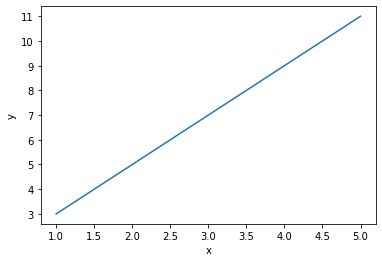

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

reg = LinearRegression()

Xsample = [[1],[2],[3],[4],[5]]
Ysample = [[3],[5],[7],[9],[11]]
plt.xlabel('x')
plt.ylabel('y')
plt.plot(Xsample, Ysample)

In [ ]:
Model = reg.fit(Xsample, Ysample)
print("coef")
print(Model.coef_)
print("intercept")
print(Model.intercept_)

coef
[[2.]]
intercept
[1.]


In [ ]:
Model.predict([[15]])

array([[31.]])

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X = california.data
DF = pd.DataFrame(X, columns = california.feature_names)
Y = california.target
print(DF)

       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns]


No handles with labels found to put in legend.


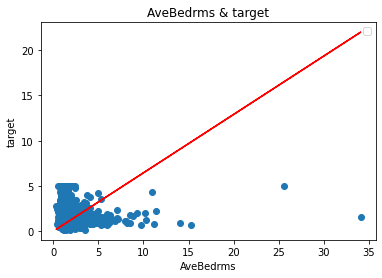

In [ ]:
i = 3
plt.title(california.feature_names[i] + ' & ' + 'target')
plt.xlabel(california.feature_names[i])
plt.ylabel('target')
plt.scatter(DF[california.feature_names[i]], Y)
plt.legend()
plt.show()

In [ ]:
Model = reg.fit(X, Y)
print("coef")
print(Model.coef_)
print("intercept")
print(Model.intercept_)

coef
[ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
intercept
-36.94192020718441


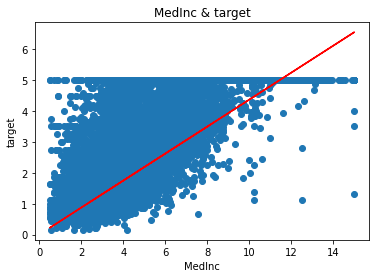

In [ ]:
i = 0
plt.title(california.feature_names[i] + ' & ' + 'target')
plt.xlabel(california.feature_names[i])
plt.ylabel('target')
plt.scatter(DF[california.feature_names[i]], Y)
plt.plot(DF[california.feature_names[i]], Model.coef_[i]*DF[california.feature_names[i]], 'r-')
plt.show()